## Importing Libraries and Suppressing Warnings

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# suppressing warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

## Reading Data

In [2]:
data = pd.read_csv("Petroleum Products Exported Bahrain.csv")
data.head()

,﻿Year,Petroleum Products Exported,المنتجات البترولية المصدرة للخارج,"(,000) U.S. Barrel"
0,2017,Naphtha,نفـثا,13379.0
1,2019,Naphtha,نفـثا,15353.0
2,2020,Naphtha,نفـثا,14579.0
3,2020,Gasoline,غازولين,0.0
4,2021,Gasoline,غازولين,0.0


## Data Preprocessing and Encoding


In [5]:
# Fixing column names by stripping any hidden characters
data.columns = ['Year', 'Petroleum Products Exported', 'Arabic Translation', '(,000) U.S. Barrel']

# Dropping the Arabic translation column
data.drop(columns='Arabic Translation', inplace=True)

# One-hot encoding the categorical variable
data_encoded = pd.get_dummies(data['Petroleum Products Exported'])

# Combining the encoded columns with the original dataset
data_combined = pd.concat([data[['Year']], data_encoded], axis=1)

## Visualizing the Trend of Total Exports Over the Years


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


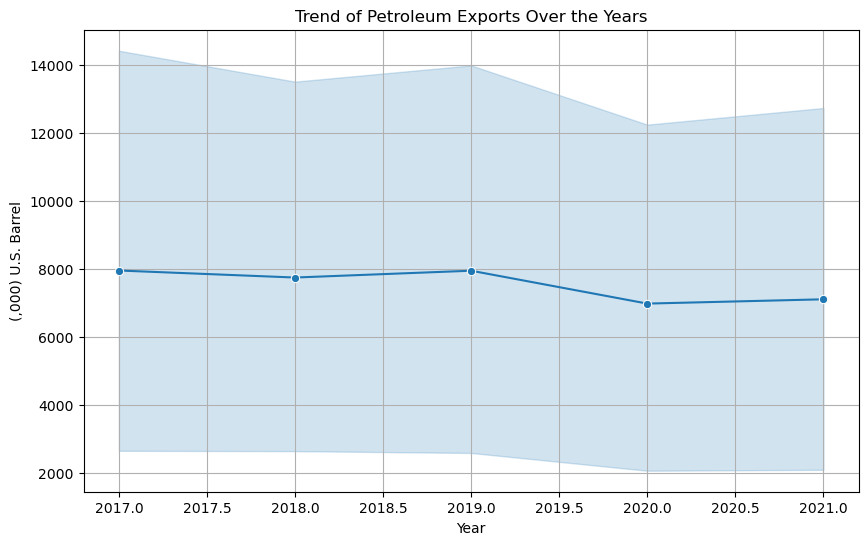

In [7]:
# Trend of total exports over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='(,000) U.S. Barrel', data=data, marker='o')
plt.title('Trend of Petroleum Exports Over the Years')
plt.xlabel('Year')
plt.ylabel('(,000) U.S. Barrel')
plt.grid(True)
plt.show()

## Visualizing the Export Volume of Petroleum Products Over the Years


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


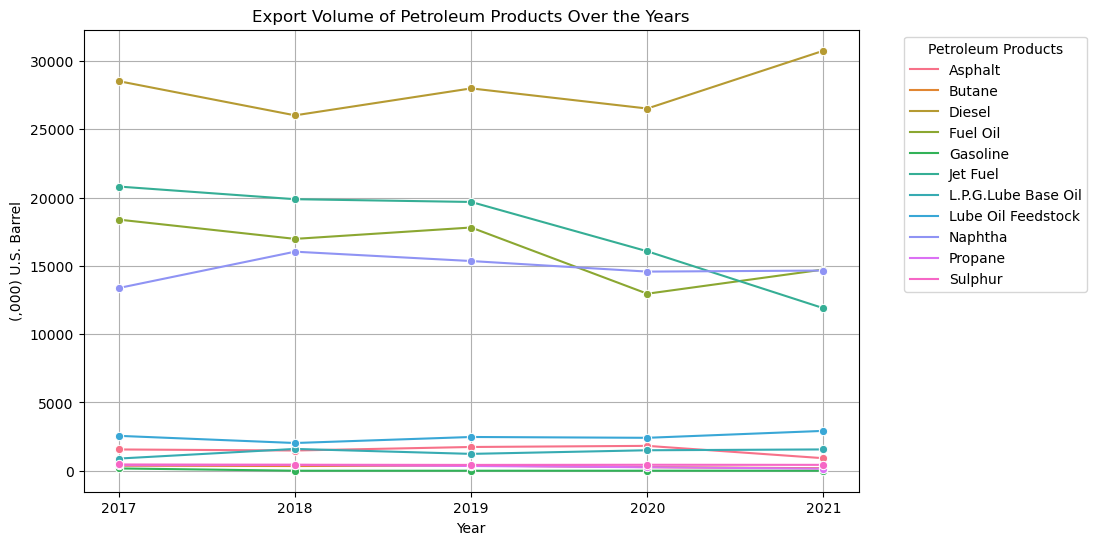

In [9]:
# Grouping the data by Year and Petroleum Products and summing the exports
grouped_data = data.groupby(['Year', 'Petroleum Products Exported'])['(,000) U.S. Barrel'].sum().reset_index()

# Setting up the plot
plt.figure(figsize=(10, 6))

# Creating a line plot for each petroleum product
sns.lineplot(x='Year', y='(,000) U.S. Barrel', hue='Petroleum Products Exported', data=grouped_data, marker='o')

# Customizing the plot
plt.title('Export Volume of Petroleum Products Over the Years')
plt.xlabel('Year')
plt.ylabel('(,000) U.S. Barrel')
plt.xticks(grouped_data['Year'].unique())  # Ensure all years are shown
plt.legend(title='Petroleum Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Performing Deep Learning Process: Data Preparation, Model Building, Training, and Evaluation


In [11]:
# Preparing the input features X and target output y
X = data_combined
y = data['(,000) U.S. Barrel']

In [13]:
# Splitting the data into 60% training, 20% cross-validation, and 20% test sets
X_train, X_temp, y_train, y_temp = train_test_split(data_combined, data['(,000) U.S. Barrel'], test_size=0.40, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)
print('X_train,shape:', X_train.shape, 'X_cv.shape:', X_cv.shape, 'X_test.shape:', X_test.shape)

X_train,shape: (33, 12) X_cv.shape: (11, 12) X_test.shape: (11, 12)


In [15]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Setting an appropriate learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)  # Increased from the default of 0.001

# Building the model again using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compiling the model with the custom optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_data=(X_cv_scaled, y_cv))

Epoch 1/150


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 148649088.0000 - val_loss: 150862992.0000
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 158479440.0000 - val_loss: 150845488.0000
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 156250768.0000 - val_loss: 150825024.0000
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 155766512.0000 - val_loss: 150798896.0000
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 158417904.0000 - val_loss: 150766928.0000
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 151338816.0000 - val_loss: 150728400.0000
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 158261392.0000 - val_loss: 150683456.0000
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 158281488.0000 - val_loss: 150630800.0000
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 158252032.0000 - val_loss: 150569328.0000
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155956736.0000 - val_loss: 150494192.0000
Epoch 11/150
2/2 ━━━

In [19]:
# Evaluating the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2234454.2500
Test Loss: 2234454.25


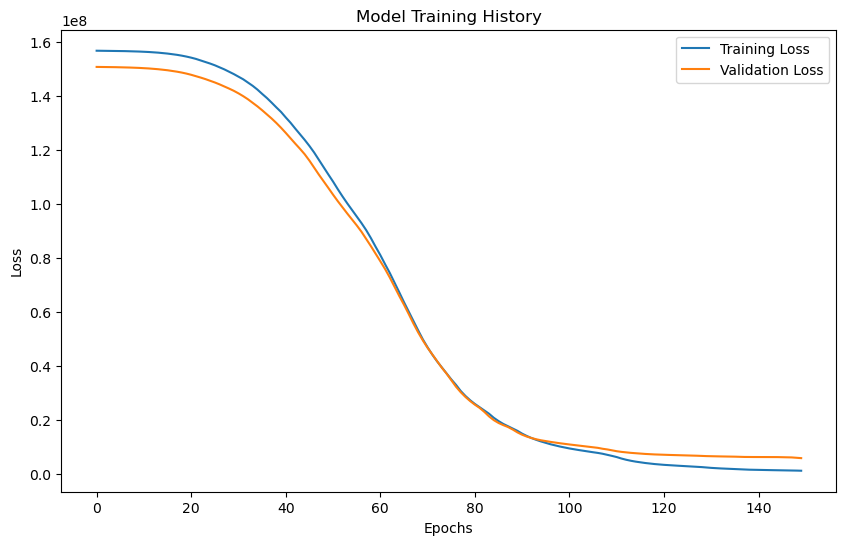

In [21]:
# Plotting training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predicting Future Export Volume Based on Year and Selected Petroleum Products
#### Feel free to modify the code by changing the year and the pertroleum product 


In [25]:
# Example prediction for a future year and products
future_year = 2025
future_products = ['Diesel']  # Example product types

In [27]:
# Creating a one-hot encoded array for the future input feature of the Petroleum Products Exported
future_features = np.zeros(len(data_combined.columns))
future_features[0] = future_year  # Assuming 'Year' is the first column
for product in future_products:
    if product in data_encoded.columns:
        future_features[data_encoded.columns.get_loc(product) + 1] = 1  # +1 to account for the 'Year' column

In [29]:
# Standardizing the future features
future_features_scaled = scaler.transform([future_features])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Final Prediction

In [31]:
# Making prediction
future_prediction = model.predict(future_features_scaled)
print(f'Predicted (,000) U.S. Barrel for {future_year}: {future_prediction[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted (,000) U.S. Barrel for 2025: 29122.732421875


## Evaluating the Model's Performance and Accuracy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test MSE: 2234454.1705
Test RMSE: 1494.8091
Test R²: 0.9707


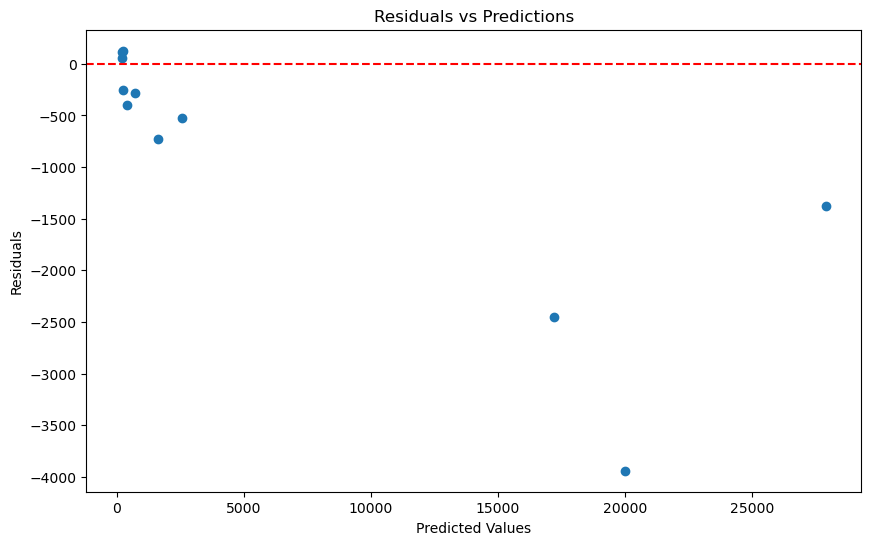

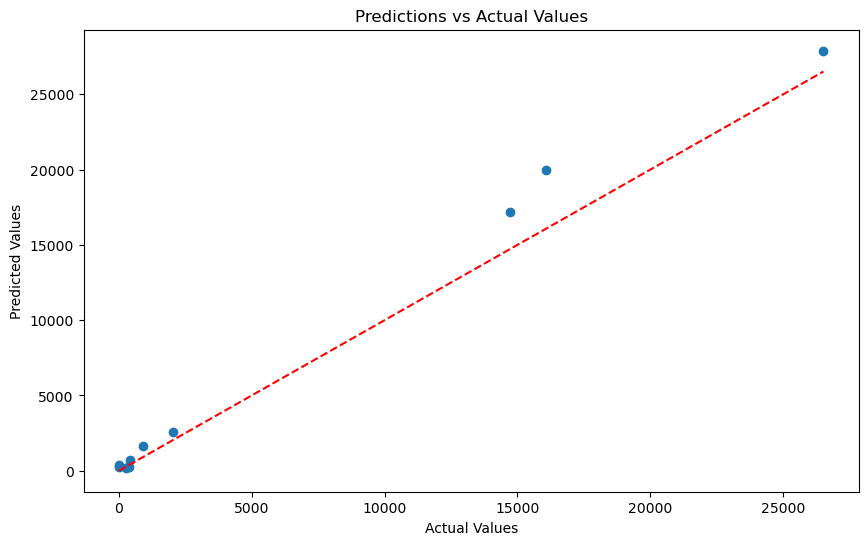

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Calculate MSE and RMSE for the test set
test_predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

# 2. Residual Analysis
residuals = y_test - test_predictions.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Plotting Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()